In [213]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [214]:
# 한글 폰트 문제 해결
# matplotlib는 한글폰트를 지원하지 않음
# is정보
import platform
# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# 시각화 도구
from matplotlib import pyplot as plt
%matplotlib inline
# uniccode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin': #os 가 mac일때
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = 'C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family = font_name)
else:
    print("Unknown system")

In [215]:
clien=pd.read_csv('./clien.csv')

In [216]:
clien.head()

,Unnamed: 0,index,추천수,게시판,제목,리플수,아이디,조회수,날짜,문서번호,사진유무
0,0,0,0,모공,좋아하는 바다 사진 2번째.jpg,0,우득우득,172,2020-02-03 21:04:39,14556250,Y
1,1,1,0,모공,알리 몇개 구매 배송전인데요..,0,선장다이스,31,2020-02-03 21:04:39,14556249,Y
2,2,2,0,모공,A8004T-XR WiFi 문제는 배전함에 있던 스위치 때문인것 같네요...,0,Nasacort,61,2020-02-03 21:04:07,14556247,Y
3,3,3,0,모공,왜냐맨 김하늘 pd 롤 스트리밍 하네요ㅋ,0,R.A.T.M,253,2020-02-03 21:02:47,14556245,Y
4,4,4,2,모공,펌) '정부 때문에 마스크 못판다'의 진실,0,의심과낭만,485,2020-02-03 21:02:45,14556244,Y


In [217]:
clien=clien[['추천수','게시판','제목','리플수','아이디','조회수','날짜','문서번호','사진유무']]

In [218]:
clien.info()
clien.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131118 entries, 0 to 131117
Data columns (total 9 columns):
추천수     131118 non-null int64
게시판     131118 non-null object
제목      131118 non-null object
리플수     131118 non-null int64
아이디     131118 non-null object
조회수     131118 non-null object
날짜      131118 non-null object
문서번호    131118 non-null int64
사진유무    131118 non-null object
dtypes: int64(3), object(6)
memory usage: 9.0+ MB


(131118, 9)

In [219]:
# 조회수가 1000이상이면 1k식으로 저장이 되기때문에 조회수 컬럼이 object 타입으로 나옴

In [220]:
# Change date to datetype
clien['날짜']=pd.to_datetime(clien['날짜'])

In [221]:
# 조회수 . k 단위 int로 변경
clien['조회수int'] =""
for i in range(len(clien['조회수'])):
    if "k" in str(clien['조회수'][i]):
        a = str(clien['조회수'][i])
        b = a.replace("k","0000").replace(" ","")
        c = round(float(b)*1000)
        clien['조회수int'][i] = int(c)
    else:
        clien['조회수int'][i]= int(clien['조회수'][i])


In [222]:
#int변경
clien['조회수int'] = clien['조회수int'].astype(int)
# clien['조회수int'] = pd.to_numeric(clien.조회수int, errors = 'coerce')

In [223]:
# null값 없음
clien['조회수int'].isnull().sum()

0

In [224]:
# 1보다 작은거 없음
clien[clien['조회수int']<1]

,추천수,게시판,제목,리플수,아이디,조회수,날짜,문서번호,사진유무,조회수int


In [225]:
# clien Feature 구성
clien['date'] = clien['날짜'].dt.date
clien['year'] = clien['날짜'].dt.year
clien['month'] = clien['날짜'].dt.month
clien['day'] = clien['날짜'].dt.day
clien['hour'] = clien['날짜'].dt.hour
clien['minute'] = clien['날짜'].dt.minute
clien['second'] = clien['날짜'].dt.second
clien['dayofweek'] = clien['날짜'].dt.dayofweek

In [226]:
# check basic info and size
clien.info()
clien.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131118 entries, 0 to 131117
Data columns (total 18 columns):
추천수          131118 non-null int64
게시판          131118 non-null object
제목           131118 non-null object
리플수          131118 non-null int64
아이디          131118 non-null object
조회수          131118 non-null object
날짜           131118 non-null datetime64[ns]
문서번호         131118 non-null int64
사진유무         131118 non-null object
조회수int       131118 non-null int32
date         131118 non-null object
year         131118 non-null int64
month        131118 non-null int64
day          131118 non-null int64
hour         131118 non-null int64
minute       131118 non-null int64
second       131118 non-null int64
dayofweek    131118 non-null int64
dtypes: datetime64[ns](1), int32(1), int64(10), object(6)
memory usage: 17.5+ MB


(131118, 18)

In [227]:
holiday = pd.read_excel('./holiday.xlsx')

In [228]:
holiday.head()

,순서,년,월,일,설명
0,1,2018,1,1,새해
1,2,2018,2,15,설날
2,3,2018,2,16,설날
3,4,2018,2,17,설날
4,5,2018,3,1,삼일절


In [229]:
holiday['일']=holiday['일'].astype(str)
holiday['월']=holiday['월'].astype(str)
holiday['년']=holiday['년'].astype(str)

In [230]:
holiday['날짜'] = holiday['년']+"-"+holiday['월']+"-"+holiday['일']

In [231]:
holiday['date']=pd.to_datetime(holiday['날짜'])

In [232]:
holiday.head()
holiday = holiday[['설명','date']]
    

In [233]:
holiday.to_csv('./holiday.csv', index =False)

In [234]:
holiday

,설명,date
0,새해,2018-01-01
1,설날,2018-02-15
2,설날,2018-02-16
3,설날,2018-02-17
4,삼일절,2018-03-01
...,...,...
61,추석,2021-10-21
62,추석,2021-10-22
63,개천절,2021-10-03
64,한글날,2021-10-09


In [235]:
clien.head()

,추천수,게시판,제목,리플수,아이디,조회수,날짜,문서번호,사진유무,조회수int,date,year,month,day,hour,minute,second,dayofweek
0,0,모공,좋아하는 바다 사진 2번째.jpg,0,우득우득,172,2020-02-03 21:04:39,14556250,Y,172,2020-02-03,2020,2,3,21,4,39,0
1,0,모공,알리 몇개 구매 배송전인데요..,0,선장다이스,31,2020-02-03 21:04:39,14556249,Y,31,2020-02-03,2020,2,3,21,4,39,0
2,0,모공,A8004T-XR WiFi 문제는 배전함에 있던 스위치 때문인것 같네요...,0,Nasacort,61,2020-02-03 21:04:07,14556247,Y,61,2020-02-03,2020,2,3,21,4,7,0
3,0,모공,왜냐맨 김하늘 pd 롤 스트리밍 하네요ㅋ,0,R.A.T.M,253,2020-02-03 21:02:47,14556245,Y,253,2020-02-03,2020,2,3,21,2,47,0
4,2,모공,펌) '정부 때문에 마스크 못판다'의 진실,0,의심과낭만,485,2020-02-03 21:02:45,14556244,Y,485,2020-02-03,2020,2,3,21,2,45,0


In [236]:
clien['date'] = clien['date'].astype(str)
holiday['date']= holiday['date'].astype(str)

In [246]:
clien = pd.merge(clien,holiday,how ='left',on ='date')

In [ ]:
# 전처리 끗

In [247]:
clien[(clien['설명'].notnull())]

,추천수,게시판,제목,리플수,아이디,조회수,날짜,문서번호,사진유무,조회수int,date,year,month,day,hour,minute,second,dayofweek,holiday,설명
15792,0,모공,용인시 의심환자 발생..,0,초보아빵,11.4 k,2020-01-27 23:59:33,14533337,N,11400,2020-01-27,2020,1,27,23,59,33,0,0,설날대체휴일
15793,0,모공,트럼프: 시 주석에게 바이러스 관련 언제든지 지원가능하다고 말했어,7,T1.Canna,1920,2020-01-27 23:58:31,14533334,N,1920,2020-01-27,2020,1,27,23,58,31,0,0,설날대체휴일
15794,0,모공,데스크미니 a300 에 관심이 생겨서... 라이젠 3400G 씨퓨 가격이 31만?,0,마음하늘,1597,2020-01-27 23:58:03,14533333,N,1597,2020-01-27,2020,1,27,23,58,3,0,0,설날대체휴일
15795,0,모공,퐁당퐁당 love 재미있네요 (수정),19,天上天下,1386,2020-01-27 23:56:08,14533329,N,1386,2020-01-27,2020,1,27,23,56,8,0,0,설날대체휴일
15796,0,모공,결혼은 좋은겁니다.,0,볶은양파,4647,2020-01-27 23:55:02,14533325,N,4647,2020-01-27,2020,1,27,23,55,2,0,0,설날대체휴일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90615,0,모공,성탄절 클럽 갔다가 형신 됐네요,5,sbrnbrks,2822,2019-12-25 00:01:24,14424511,N,2822,2019-12-25,2019,12,25,0,1,24,2,0,크리스마스
90616,0,모공,오리지널 스트리트파이터 1탄 기계,0,불의정령,2509,2019-12-25 00:00:46,14424508,N,2509,2019-12-25,2019,12,25,0,0,46,2,0,크리스마스
90617,7,모공,제가 지금 닭강정을 사러 가는건 불가능하고..,3,하론[Haron],3388,2019-12-25 00:00:26,14424507,N,3388,2019-12-25,2019,12,25,0,0,26,2,0,크리스마스
90618,1,모공,메리크리스마스~,0,오로로로,413,2019-12-25 00:00:10,14424506,N,413,2019-12-25,2019,12,25,0,0,10,2,0,크리스마스


In [257]:
clien[;HOLIDAY]

SyntaxError: invalid syntax (<ipython-input-257-827a4d3cc1e9>, line 1)

In [249]:
clien['holiday'] = 0
clien.loc[(clien['dayofweek'] == 5) | (clien['dayofweek'] == 6)|(clien['설명'].notnull()),'holiday']=1

## loc가 중요

In [259]:
clien

,추천수,게시판,제목,리플수,아이디,조회수,날짜,문서번호,사진유무,조회수int,date,year,month,day,hour,minute,second,dayofweek,holiday,설명
0,0,모공,좋아하는 바다 사진 2번째.jpg,0,우득우득,172,2020-02-03 21:04:39,14556250,Y,172,2020-02-03,2020,2,3,21,4,39,0,0,NaN
1,0,모공,알리 몇개 구매 배송전인데요..,0,선장다이스,31,2020-02-03 21:04:39,14556249,Y,31,2020-02-03,2020,2,3,21,4,39,0,0,NaN
2,0,모공,A8004T-XR WiFi 문제는 배전함에 있던 스위치 때문인것 같네요...,0,Nasacort,61,2020-02-03 21:04:07,14556247,Y,61,2020-02-03,2020,2,3,21,4,7,0,0,NaN
3,0,모공,왜냐맨 김하늘 pd 롤 스트리밍 하네요ㅋ,0,R.A.T.M,253,2020-02-03 21:02:47,14556245,Y,253,2020-02-03,2020,2,3,21,2,47,0,0,NaN
4,2,모공,펌) '정부 때문에 마스크 못판다'의 진실,0,의심과낭만,485,2020-02-03 21:02:45,14556244,Y,485,2020-02-03,2020,2,3,21,2,45,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131113,0,아질게,가전제품 설치 기사님이 집안 물건을 망가뜨려서 처리 받으신분 계신가요?,0,화르륽,333,2019-12-05 12:19:52,14361578,N,333,2019-12-05,2019,12,5,12,19,52,3,0,NaN
131114,2,모공,이렇게 하면 어떨런지. 추법무장관님.,3,TheLK,598,2019-12-05 12:19:33,14361577,N,598,2019-12-05,2019,12,5,12,19,33,3,0,NaN
131115,14,모공,스칼렛 요한슨 조국사태 커버 잡지 들고 찍은 이유,0,왕왕이돌이,11.4 k,2019-12-05 12:19:23,14361576,N,11400,2019-12-05,2019,12,5,12,19,23,3,0,NaN
131116,0,모공,태연) 요새 타이달 업데이트가 빠르네요 ㅋ,7,키즈리턴,1279,2019-12-05 12:19:06,14361575,N,1279,2019-12-05,2019,12,5,12,19,6,3,0,NaN


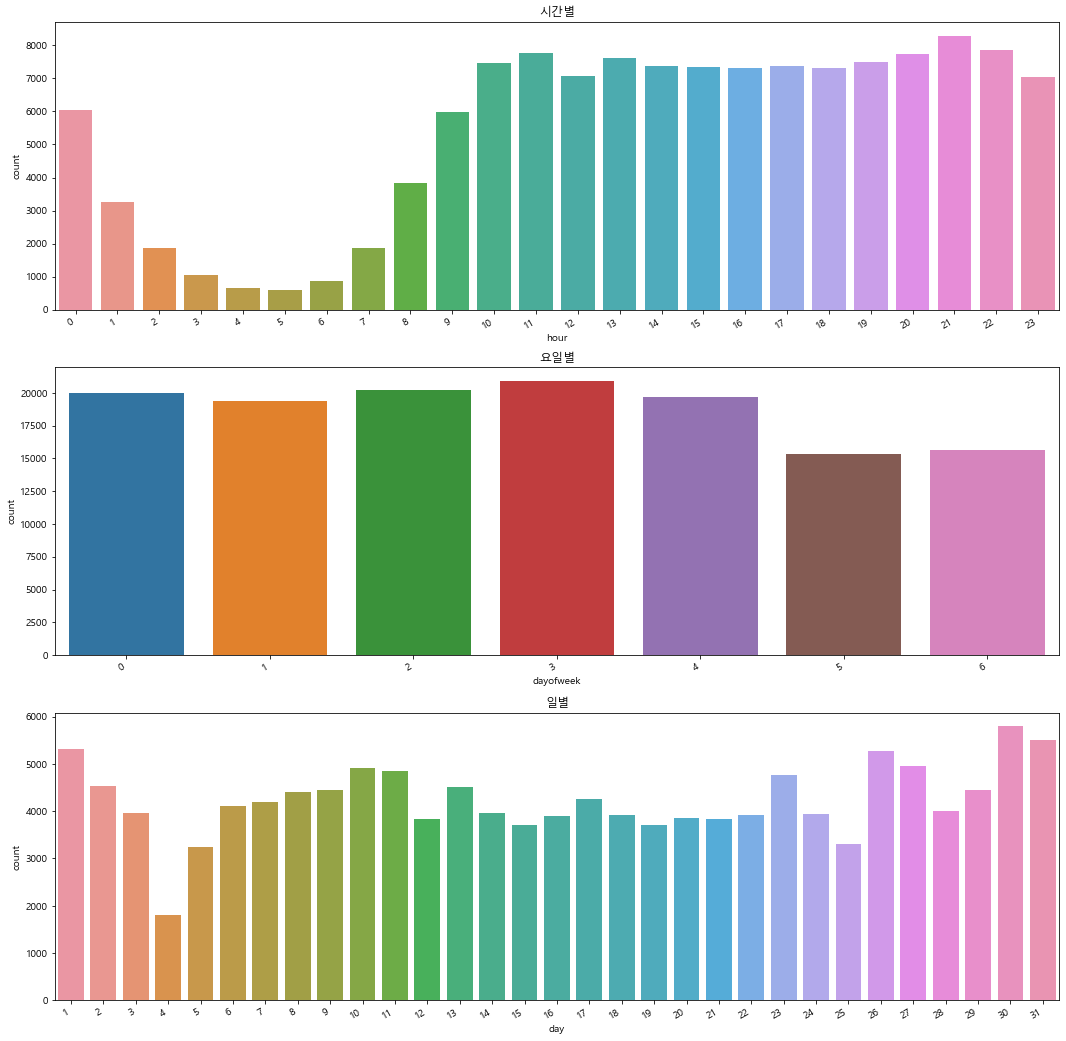

In [260]:
fig, axes = plt.subplots(nrows=3)
fig.set_size_inches(18,18)

# train data
plt.sca(axes[0])
plt.xticks(rotation=30, ha='right') # x축 글자
axes[0].set(ylabel='Count', title='시간별')
sns.countplot(data=clien, x='hour', ax=axes[0])

#test data
plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='Count', title='요일별')
sns.countplot(data=clien, x='dayofweek', ax=axes[1])

#test data
plt.sca(axes[2])
plt.xticks(rotation=30, ha='right')
axes[2].set(ylabel='Count', title='일별')
sns.countplot(data=clien, x='day', ax=axes[2])

11시대가 제일 글리젠이 많이되고 있으며 9시부터 23시까지의 활동량은 비슷하다.    
13시대가 식사하고 돌아와서 소화시키면서 글을 쓰는경우가 많을것 같고    
18시대는 퇴근전이나, 야근전 석식 먹기전에 루즈한 타임    
20,21시대는 석식후에 체크하는 타이밍    
25일같이 휴일인 경우에는 글리젠이 적다(쉬는날 타임 컬럼에 넣기)    
금요일, 크리스마스 전날인 경우엔 글리젠이 적고 크리스마스 후에는 글리젠이 많다.    
금요일이나, 공휴일 전에는 다음날 쉬는 이점이 있으므로 저녁 약속을 잡아 그런것 같다    
(몇시부터 적어지기 시작하는지 체크 - 평일과 함께 체크)     

0이 월요일


In [ ]:
clien.describe()

In [ ]:
perday=clien.pivot_table('조회수int',index = "hour", columns = 'dayofweek',aggfunc='mean')

In [ ]:
clien['조회수int'].describe()

In [ ]:
perday.columns = ['월','화','수','목','금','토','일']

In [ ]:
perday

In [ ]:
perday.iloc[:,1]

In [ ]:
# fig, axes = plt.subplots(8,1, figsize = (20,90))
# axes
# axes[0].plot(perday)
# # for i in range(len(perday.columns)):
# #     axes[i,0].plot(kind='bar')
# for i in range(len(perday.columns)):
#     axes[int(i)+(1)].plot(perday.iloc[:,i])

# 위와 아래는 동일함
# 아래대로 써야 타입이랑 바꿔주기 쉽다
fig, axes = plt.subplots(8,1, figsize = (20,90))
axes
perday.plot(ax= axes[0], kind='bar')
# for i in range(len(perday.columns)):
#     axes[i,0].plot(kind='bar')
for i in range(len(perday.columns)):
    perday.iloc[:,i].plot(ax = axes[int(i)+1], kind = 'bar')
    

In [ ]:
clien.loc[clien['dayofweek']==0,:].describe()

In [ ]:
perday=clien.pivot_table('리플수',index = "hour", columns = 'dayofweek',aggfunc='mean')

In [ ]:
# fig, axes = plt.subplots(8,1, figsize = (20,90))
# axes
# axes[0].plot(perday)
# # for i in range(len(perday.columns)):
# #     axes[i,0].plot(kind='bar')
# for i in range(len(perday.columns)):
#     axes[int(i)+(1)].plot(perday.iloc[:,i])

# 위와 아래는 동일함
# 아래대로 써야 타입이랑 바꿔주기 쉽다
fig, axes = plt.subplots(8,1, figsize = (20,90))
axes
perday.plot(ax= axes[0], kind='bar')
# for i in range(len(perday.columns)):
#     axes[i,0].plot(kind='bar')
for i in range(len(perday.columns)):
    perday.iloc[:,i].plot(ax = axes[int(i)+1], kind = 'bar')
    

비슷한 양상을 보임
약간의 시간차는 잇지만 5~6 시쯤 올린글에 대해서 
수요일과 금요일 새벽이 리플이 잘 달렸다